In [15]:
import pandas as pd
import numpy as np
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt




In [16]:
# Reading data
X_train = pd.read_csv('layoffs.csv')
df = X_train.copy()
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lemon,Buenos Aires,Crypto,NaN,0.38,2022-11-24,Series A,Argentina,17.0
1,Assure,Salt Lake City,Finance,NaN,1.00,2022-11-23,Seed,United States,2.0
2,GoodGood,Toronto,Retail,NaN,1.00,2022-11-23,Seed,Canada,6.0
3,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
4,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0


In [17]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         486
percentage_laid_off    550
date                     0
stage                    4
country                  0
funds_raised           116
dtype: int64

In [18]:
df.total_laid_off = df.total_laid_off.fillna(0)
df.industry = df.industry.fillna(0)
df.stage = df.stage.fillna(0)
df.funds_raised = df.funds_raised.fillna(0)
df.percentage_laid_off = df.percentage_laid_off.fillna(0)


In [19]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

<AxesSubplot: xlabel='industry', ylabel='total laid off'>

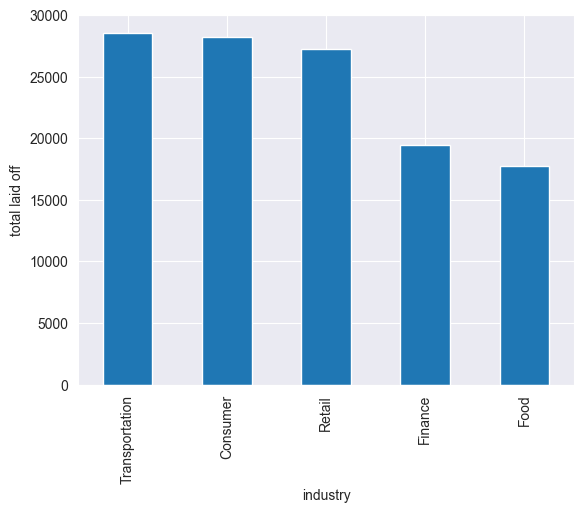

In [39]:
# top 5 total laid off in bar chart by industry
df.head()
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='company', ylabel='total laid off'>

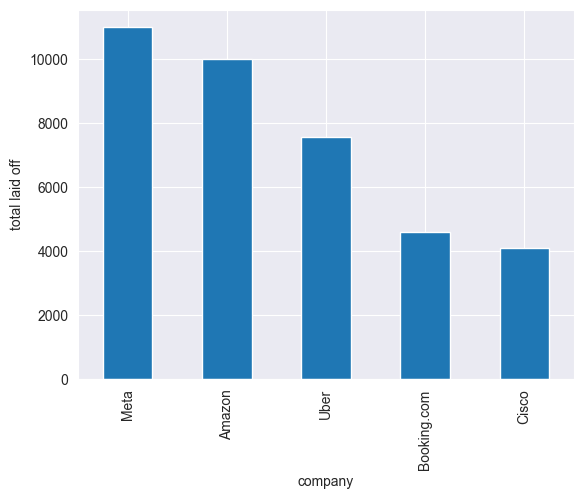

In [38]:
# top 5 total laid off by company
df.head()
df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='location', ylabel='total laid off'>

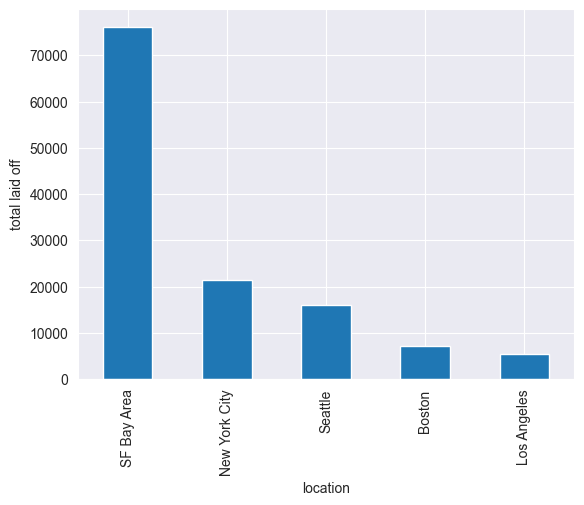

In [33]:
# Top 5 US layoffs by city
df.head()
df[(df['country'] == 'United States')].groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')


In [ ]:
#nsame exact thing but by rest of world ^
df.head()

In [ ]:
# sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)
# pd
plot = df.plot.pie(subplots=True, figsize=(11, 6))

In [ ]:
#layoffs after/during covid
#layoffs now (2022)
#machine learning to predict layoffs in upcoming years
